In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/deloittecsvfinal.csv')
df.head()

,rank,company_name,primary_industry,percentage_growth,city,state_province,ceo_name,year
0,1,SwanLeap,Software,77260,Madison,WI,Brad Hollister,2018
1,2,Justworks,Software,27150,New York,NY,Isaac Oates,2018
2,3,Shape Security,Software,23576,Mountain View,CA,Derek Smith,2018
3,4,Periscope Data,Software,23227,San Francisco,CA,Harry Glaser,2018
4,5,"Arrowhead Pharmaceuticals , Inc.",Biotechnology / pharmaceutical,17847,Pasadena,CA,Christopher Anzalone,2018


In [2]:
df.tail()

,rank,company_name,primary_industry,percentage_growth,city,state_province,ceo_name,year
2497,496,Altus Assessments Inc.,Software & services,242,Toronto,ON,Rich Emrich,2022
2498,497,Clinical ink,Life sciences,241,Horsham,PA,Ed Seguine,2022
2499,498,"Pinterest , Inc.",Software & services,241,San Francisco,CA,Bill Ready,2022
2500,499,Podium,Software & services,241,Lehi,UT,Eric Rea,2022
2501,500,"Cloudflare , Inc.",Software & services,241,San Francisco,CA,Matthew Prince,2022


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               2502 non-null   int64 
 1   company_name       2502 non-null   object
 2   primary_industry   2502 non-null   object
 3   percentage_growth  2502 non-null   object
 4   city               2502 non-null   object
 5   state_province     2502 non-null   object
 6   ceo_name           2499 non-null   object
 7   year               2502 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 156.5+ KB


In [4]:
df.describe()

,rank,year
count,2502.000000,2502.000000
mean,250.607114,2020.000000
std,144.331877,1.414214
min,1.000000,2018.000000
25%,126.000000,2019.000000
50%,251.000000,2020.000000
75%,375.750000,2021.000000
max,500.000000,2022.000000


In [5]:
# Remove commas and other non-numeric characters from 'percentage_growth' column
df['percentage_growth'] = df['percentage_growth'].str.replace('[^\d.]', '', regex=True)

# Convert the cleaned column to float (to keep decimal values)
df['percentage_growth'] = df['percentage_growth'].astype(float)

# Optionally, you can round the float values to integers if needed
df['percentage_growth'] = df['percentage_growth'].round().astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               2502 non-null   int64 
 1   company_name       2502 non-null   object
 2   primary_industry   2502 non-null   object
 3   percentage_growth  2502 non-null   int64 
 4   city               2502 non-null   object
 5   state_province     2502 non-null   object
 6   ceo_name           2499 non-null   object
 7   year               2502 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 156.5+ KB


In [7]:
print(df.isnull().sum())

rank                 0
company_name         0
primary_industry     0
percentage_growth    0
city                 0
state_province       0
ceo_name             3
year                 0
dtype: int64


In [8]:
df['ceo_name'].fillna("Unknown", inplace=True)

In [9]:
print(df.isnull().sum())

rank                 0
company_name         0
primary_industry     0
percentage_growth    0
city                 0
state_province       0
ceo_name             0
year                 0
dtype: int64


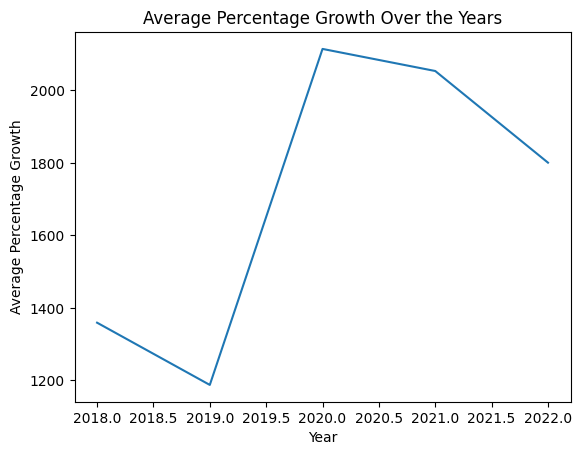

In [10]:
# Calculate average percentage growth over the years
avg_growth = df.groupby('year')['percentage_growth'].mean()

# Plot a line chart to visualize the trend
import matplotlib.pyplot as plt
avg_growth.plot(kind='line', title='Average Percentage Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Percentage Growth')
plt.show()

      year  rank
8     2018     9
517   2019    18
1100  2020   100
1812  2021   311
2500  2022   499


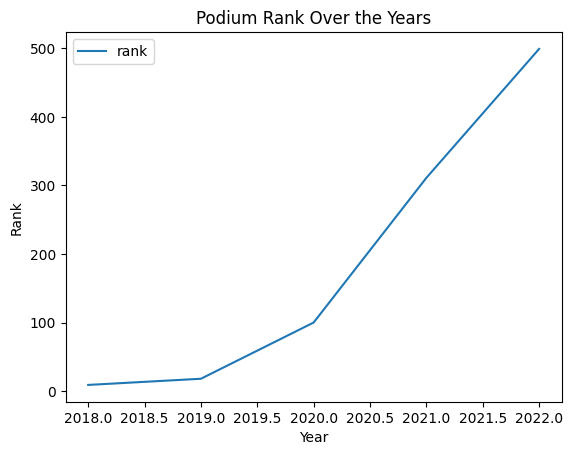

In [11]:
# Filter the DataFrame for the company 'Podium'
podium_rank = df[df['company_name'] == 'Podium']

# Print the rank of 'Podium' in each year
print(podium_rank[['year', 'rank']])

# Visualize rank changes for 'Podium' over the years
podium_rank.plot(x='year', y='rank', kind='line', title='Podium Rank Over the Years')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()

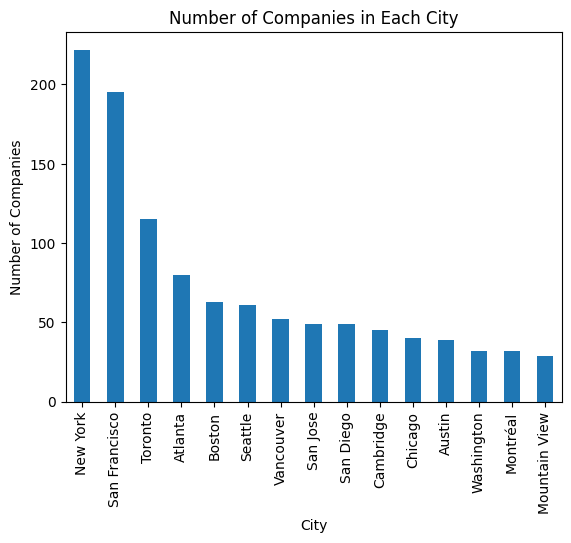

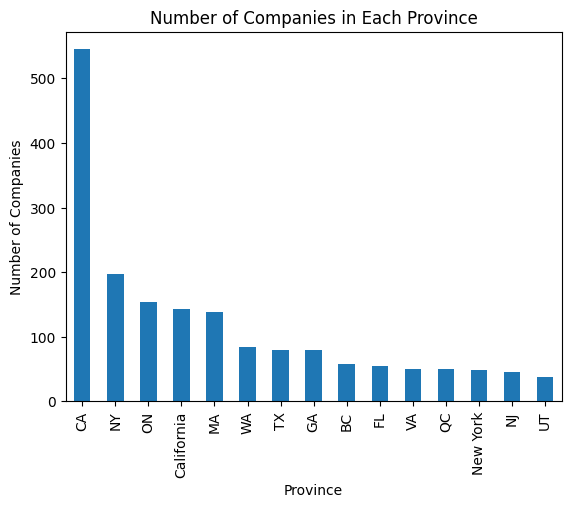

In [12]:
# Analyze the distribution of companies by city and province
city_counts = df['city'].value_counts().head(15)
province_counts = df['state_province'].value_counts().head(15)

# Visualize the distribution
city_counts.plot(kind='bar', title='Number of Companies in Each City')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.show()

province_counts.plot(kind='bar', title='Number of Companies in Each Province')
plt.xlabel('Province')
plt.ylabel('Number of Companies')
plt.show()


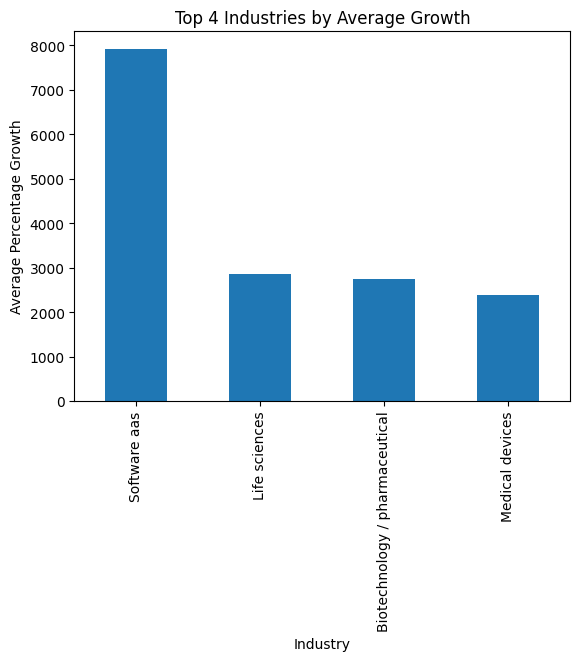

In [13]:
# Analyze industry-wise growth
industry_growth = df.groupby('primary_industry')['percentage_growth'].mean().sort_values(ascending=False)

# Visualize the industry with the highest average growth
industry_growth.head(4).plot(kind='bar', title='Top 4 Industries by Average Growth')
plt.xlabel('Industry')
plt.ylabel('Average Percentage Growth')
plt.show()


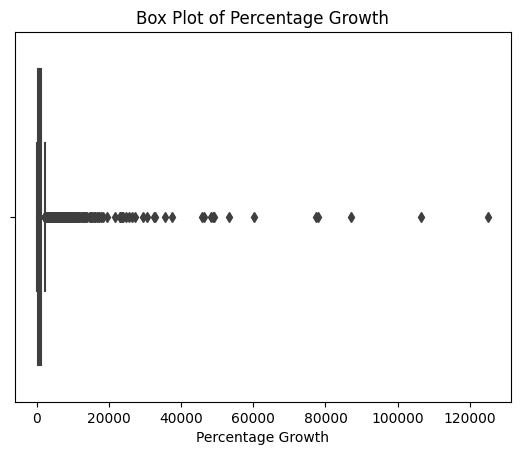

      rank                      company_name                primary_industry  \
0        1                          SwanLeap                        Software   
1        2                         Justworks                        Software   
2        3                    Shape Security                        Software   
3        4                    Periscope Data                        Software   
4        5  Arrowhead Pharmaceuticals , Inc.  Biotechnology / pharmaceutical   
500      1                            UiPath                        Software   
501      2       Sarepta Therapeutics , Inc.  Biotechnology / pharmaceutical   
1001     1  Arrowhead Pharmaceuticals , Inc.  Biotechnology / pharmaceutical   
1002     2    Ultragenyx Pharmaceutical Inc.  Biotechnology / pharmaceutical   
1003     3                    Branch Metrics                 Software & SaaS   
1004     4                          OneTrust                 Software & SaaS   
1005     5                 Transmit Secu

In [14]:

# Detect and visualize outliers using a box plot
import seaborn as sns

sns.boxplot(x=df['percentage_growth'])
plt.title('Box Plot of Percentage Growth')
plt.xlabel('Percentage Growth')
plt.show()

# Identify and print outliers (assuming a threshold)
threshold = 3  # Adjust the threshold as needed
outliers = df[df['percentage_growth'] > threshold * df['percentage_growth'].std()]
print(outliers)

<ipython-input-15-2075604eb3a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


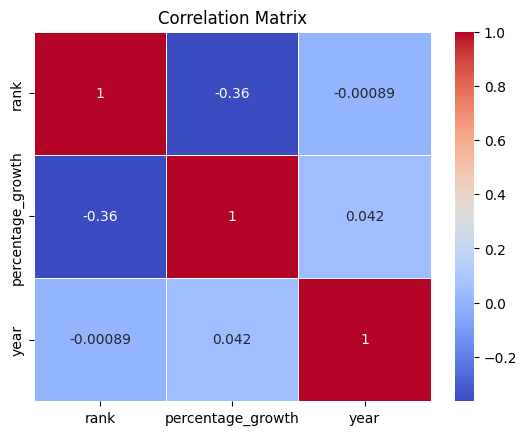

In [15]:
# Calculate correlation coefficients between rank, percentage_growth, and other variables
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
company_rank_counts = df.groupby('company_name')['rank'].nunique()

# Filter companies that have ranks for all five years (assuming 2018-2022)
consistently_ranked_companies = company_rank_counts[company_rank_counts == 5].index.tolist()

# Display companies that have consistently maintained their rank for five years
print("Companies with Consistent Rankings (2018-2022):")
for company in consistently_ranked_companies:
    print(f"Company: {company}")

    # Filter the rows for the current company
    company_data = df[df['company_name'] == company]

    # Print the rank and percentage_growth for each year
    for year in range(2018, 2023):  # Assuming 2018 to 2022
        rank = company_data[company_data['year'] == year]['rank'].values[0]
        percentage_growth = company_data[company_data['year'] == year]['percentage_growth'].values[0]
        print(f"Year {year}: Rank {rank}, Percentage Growth {percentage_growth}")

    # Calculate and print the overall average percentage growth
    average_growth = company_data['percentage_growth'].mean()
    print(f"Overall Average Percentage Growth from 2018-2022: {average_growth}\n")

Companies with Consistent Rankings (2018-2022):
Company: KnowBe4
Year 2018: Rank 34, Percentage Growth 3726
Year 2019: Rank 55, Percentage Growth 2337
Year 2020: Rank 109, Percentage Growth 1083
Year 2021: Rank 302, Percentage Growth 410
Year 2022: Rank 488, Percentage Growth 245
Overall Average Percentage Growth from 2018-2022: 1560.2

Company: Onit
Year 2018: Rank 264, Percentage Growth 327
Year 2019: Rank 249, Percentage Growth 441
Year 2020: Rank 190, Percentage Growth 641
Year 2021: Rank 304, Percentage Growth 408
Year 2022: Rank 372, Percentage Growth 369
Overall Average Percentage Growth from 2018-2022: 437.2

Company: Podium
Year 2018: Rank 9, Percentage Growth 13381
Year 2019: Rank 18, Percentage Growth 5391
Year 2020: Rank 100, Percentage Growth 1148
Year 2021: Rank 311, Percentage Growth 400
Year 2022: Rank 499, Percentage Growth 241
Overall Average Percentage Growth from 2018-2022: 4112.2

Company: Remitly
Year 2018: Rank 102, Percentage Growth 1209
Year 2019: Rank 150, Per

In [17]:
company_rank_counts = df.groupby('company_name')['year'].nunique()

# Filter companies that have ranks for only one year
one_year_companies = company_rank_counts[company_rank_counts == 1].index.tolist()

# Display companies that have been in the list for one year or less
print("Companies with Rankings for Not More Than One Year:")
for company in one_year_companies:
    print(f"Company: {company}")

    # Filter the rows for the current company
    company_data = df[df['company_name'] == company]

    # Print the rank and percentage_growth for the single year they are present
    year = company_data['year'].values[0]
    rank = company_data['rank'].values[0]
    percentage_growth = company_data['percentage_growth'].values[0]

    print(f"Year {year}: Rank {rank}, Percentage Growth {percentage_growth}\n")

Companies with Rankings for Not More Than One Year:
Company: #paid
Year 2020: Rank 203, Percentage Growth 590

Company: 10x Genomics , Inc.
Year 2019: Rank 22, Percentage Growth 4667

Company: 14th Round Inc.
Year 2021: Rank 130, Percentage Growth 1049

Company: 15 Five
Year 2022: Rank 411, Percentage Growth 311

Company: 33Across
Year 2018: Rank 362, Percentage Growth 219

Company: 360Insights
Year 2020: Rank 463, Percentage Growth 195

Company: 360insights
Year 2018: Rank 368, Percentage Growth 216

Company: 4G Clinical
Year 2022: Rank 159, Percentage Growth 909

Company: 6sense
Year 2022: Rank 130, Percentage Growth 1134

Company: ACCELQ
Year 2022: Rank 212, Percentage Growth 711

Company: ADMA Biologics , Inc.
Year 2022: Rank 365, Percentage Growth 377

Company: ANEXIO
Year 2018: Rank 100, Percentage Growth 1250

Company: AODocs
Year 2020: Rank 368, Percentage Growth 266

Company: AXS
Year 2018: Rank 386, Percentage Growth 200

Company: Aarki
Year 2019: Rank 58, Percentage Growth 2

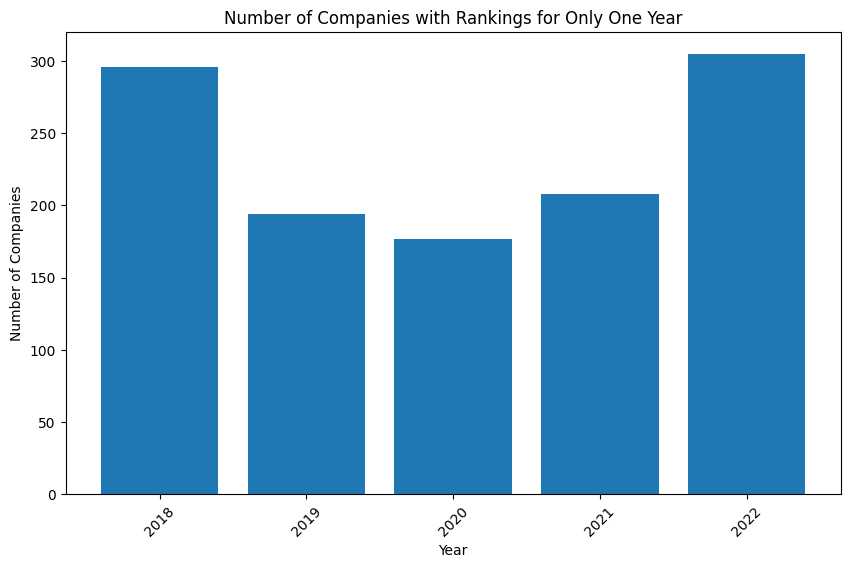

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Get the companies that have ranks for only one year
company_rank_counts = df.groupby('company_name')['year'].nunique()
one_year_companies = company_rank_counts[company_rank_counts == 1].index.tolist()

# Create a dictionary to store the counts of companies for each year
year_counts = {}

# Iterate through one-year companies and count their occurrences in each year
for company in one_year_companies:
    company_data = df[df['company_name'] == company]
    year = company_data['year'].values[0]

    # Count the number of companies for each year
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

# Convert the dictionary to a DataFrame for easy plotting
year_counts_df = pd.DataFrame(list(year_counts.items()), columns=['Year', 'Count'])

# Sort the DataFrame by year
year_counts_df = year_counts_df.sort_values(by='Year')

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(year_counts_df['Year'], year_counts_df['Count'])
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Companies with Rankings for Only One Year')
plt.xticks(rotation=45)
plt.show()
